In [ ]:
import pandas as pd
df = pd.read_csv("/content/ai4i2020.csv")
print(df.head())
print(df.info())
print(df.describe())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [ ]:
print(df.columns.tolist())

['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

['udi', 'product_id', 'type', 'air_temperature_[k]', 'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]', 'machine_failure', 'twf', 'hdf', 'pwf', 'osf', 'rnf']


In [ ]:
print(df['machine_failure'].value_counts())
print(df.columns)

machine_failure
0    9661
1     339
Name: count, dtype: int64
Index(['udi', 'product_id', 'type', 'air_temperature_[k]',
       'process_temperature_[k]', 'rotational_speed_[rpm]', 'torque_[nm]',
       'tool_wear_[min]', 'machine_failure', 'twf', 'hdf', 'pwf', 'osf',
       'rnf'],
      dtype='object')


In [ ]:

df['failure'] = df['machine_failure'].astype(int)
print(df['failure'].value_counts())

failure
0    9661
1     339
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df = df.drop_duplicates()

print(f"Dataset shape after cleaning: {df.shape}")


udi                        0
product_id                 0
type                       0
air_temperature_[k]        0
process_temperature_[k]    0
rotational_speed_[rpm]     0
torque_[nm]                0
tool_wear_[min]            0
machine_failure            0
twf                        0
hdf                        0
pwf                        0
osf                        0
rnf                        0
failure                    0
dtype: int64
Dataset shape after cleaning: (10000, 15)


In [ ]:
# Temperature difference (process - air)
df['temp_delta'] = df['process_temperature_[k]'] - df['air_temperature_[k]']

# Energy proxy = torque * rotational speed
df['power_proxy'] = df['torque_[nm]'] * df['rotational_speed_[rpm]']

# Wear rate proxy = tool_wear / rotational_speed
df['wear_rate'] = df['tool_wear_[min]'] / (df['rotational_speed_[rpm]'] + 1e-6)

# Thermal stress indicator (interaction)
df['thermal_stress'] = df['temp_delta'] * df['torque_[nm]']

In [ ]:
# Check if 'type' is categorical
print(df['type'].unique())

# One hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

['M' 'L' 'H']


In [ ]:

print(df.shape)
print(df.head())


(10000, 20)
   udi product_id  air_temperature_[k]  process_temperature_[k]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   rotational_speed_[rpm]  torque_[nm]  tool_wear_[min]  machine_failure  twf  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   hdf  pwf  osf  rnf  failure  temp_delta  power_proxy  wear_rate  \
0    0    0    0    0       

EDA

In [ ]:

print(df.describe())

               udi  air_temperature_[k]  process_temperature_[k]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       rotational_speed_[rpm]   torque_[nm]  tool_wear_[min]  machine_failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

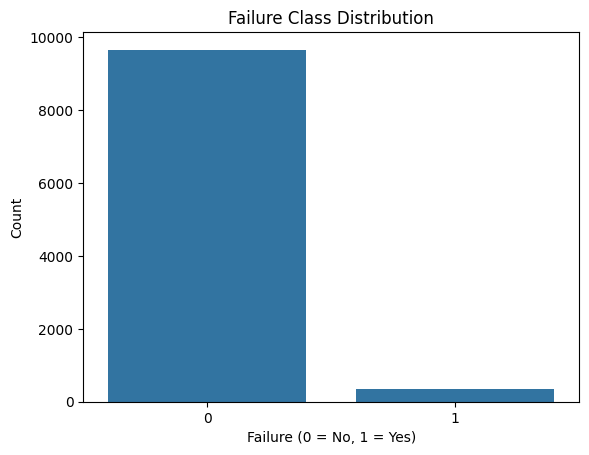

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
sns.countplot(x='failure', data=df)
plt.title('Failure Class Distribution')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

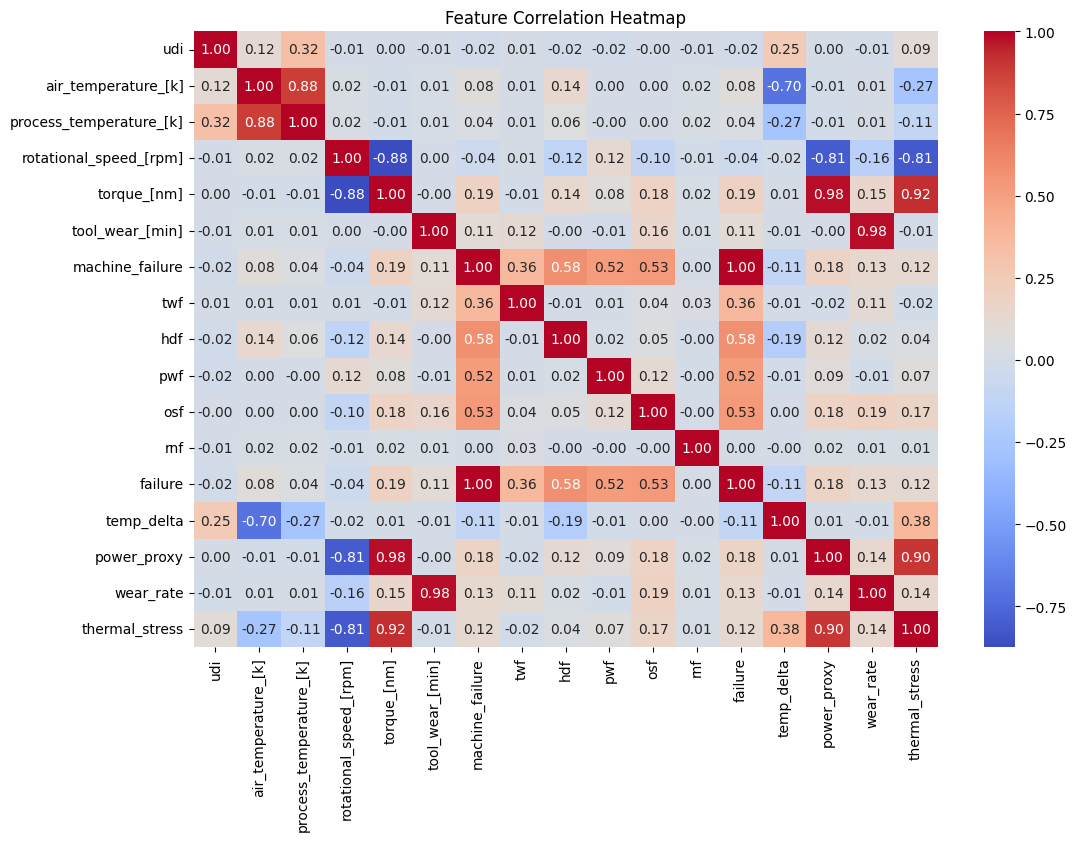

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

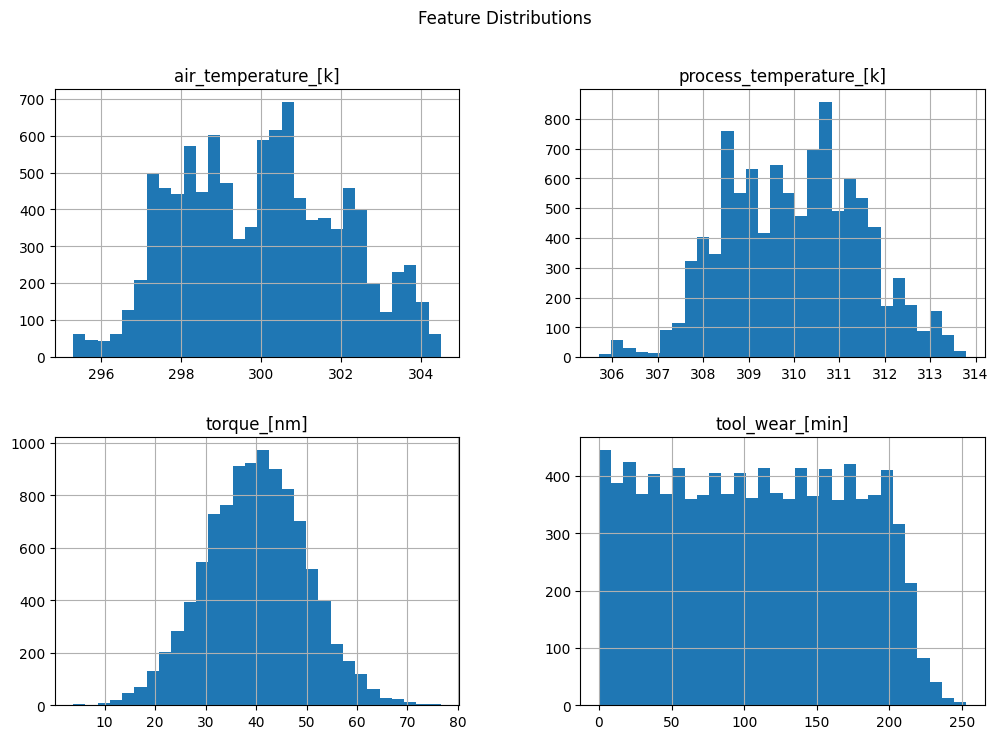

In [ ]:
df[['air_temperature_[k]', 'process_temperature_[k]', 'torque_[nm]', 'tool_wear_[min]']].hist(bins=30, figsize=(12,8))
plt.suptitle('Feature Distributions')
plt.show()

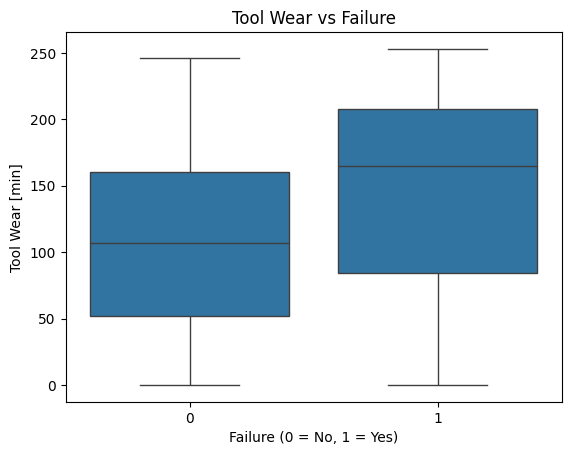

In [ ]:
sns.boxplot(x='failure', y='tool_wear_[min]', data=df)
plt.title('Tool Wear vs Failure')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Tool Wear [min]')
plt.show()


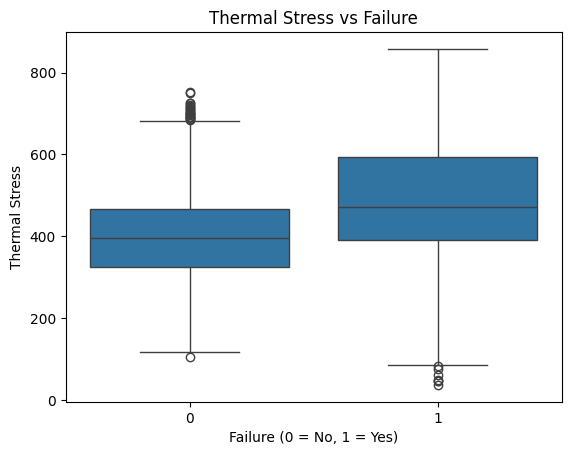

In [ ]:
sns.boxplot(x='failure', y='thermal_stress', data=df)
plt.title('Thermal Stress vs Failure')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Thermal Stress')
plt.show()

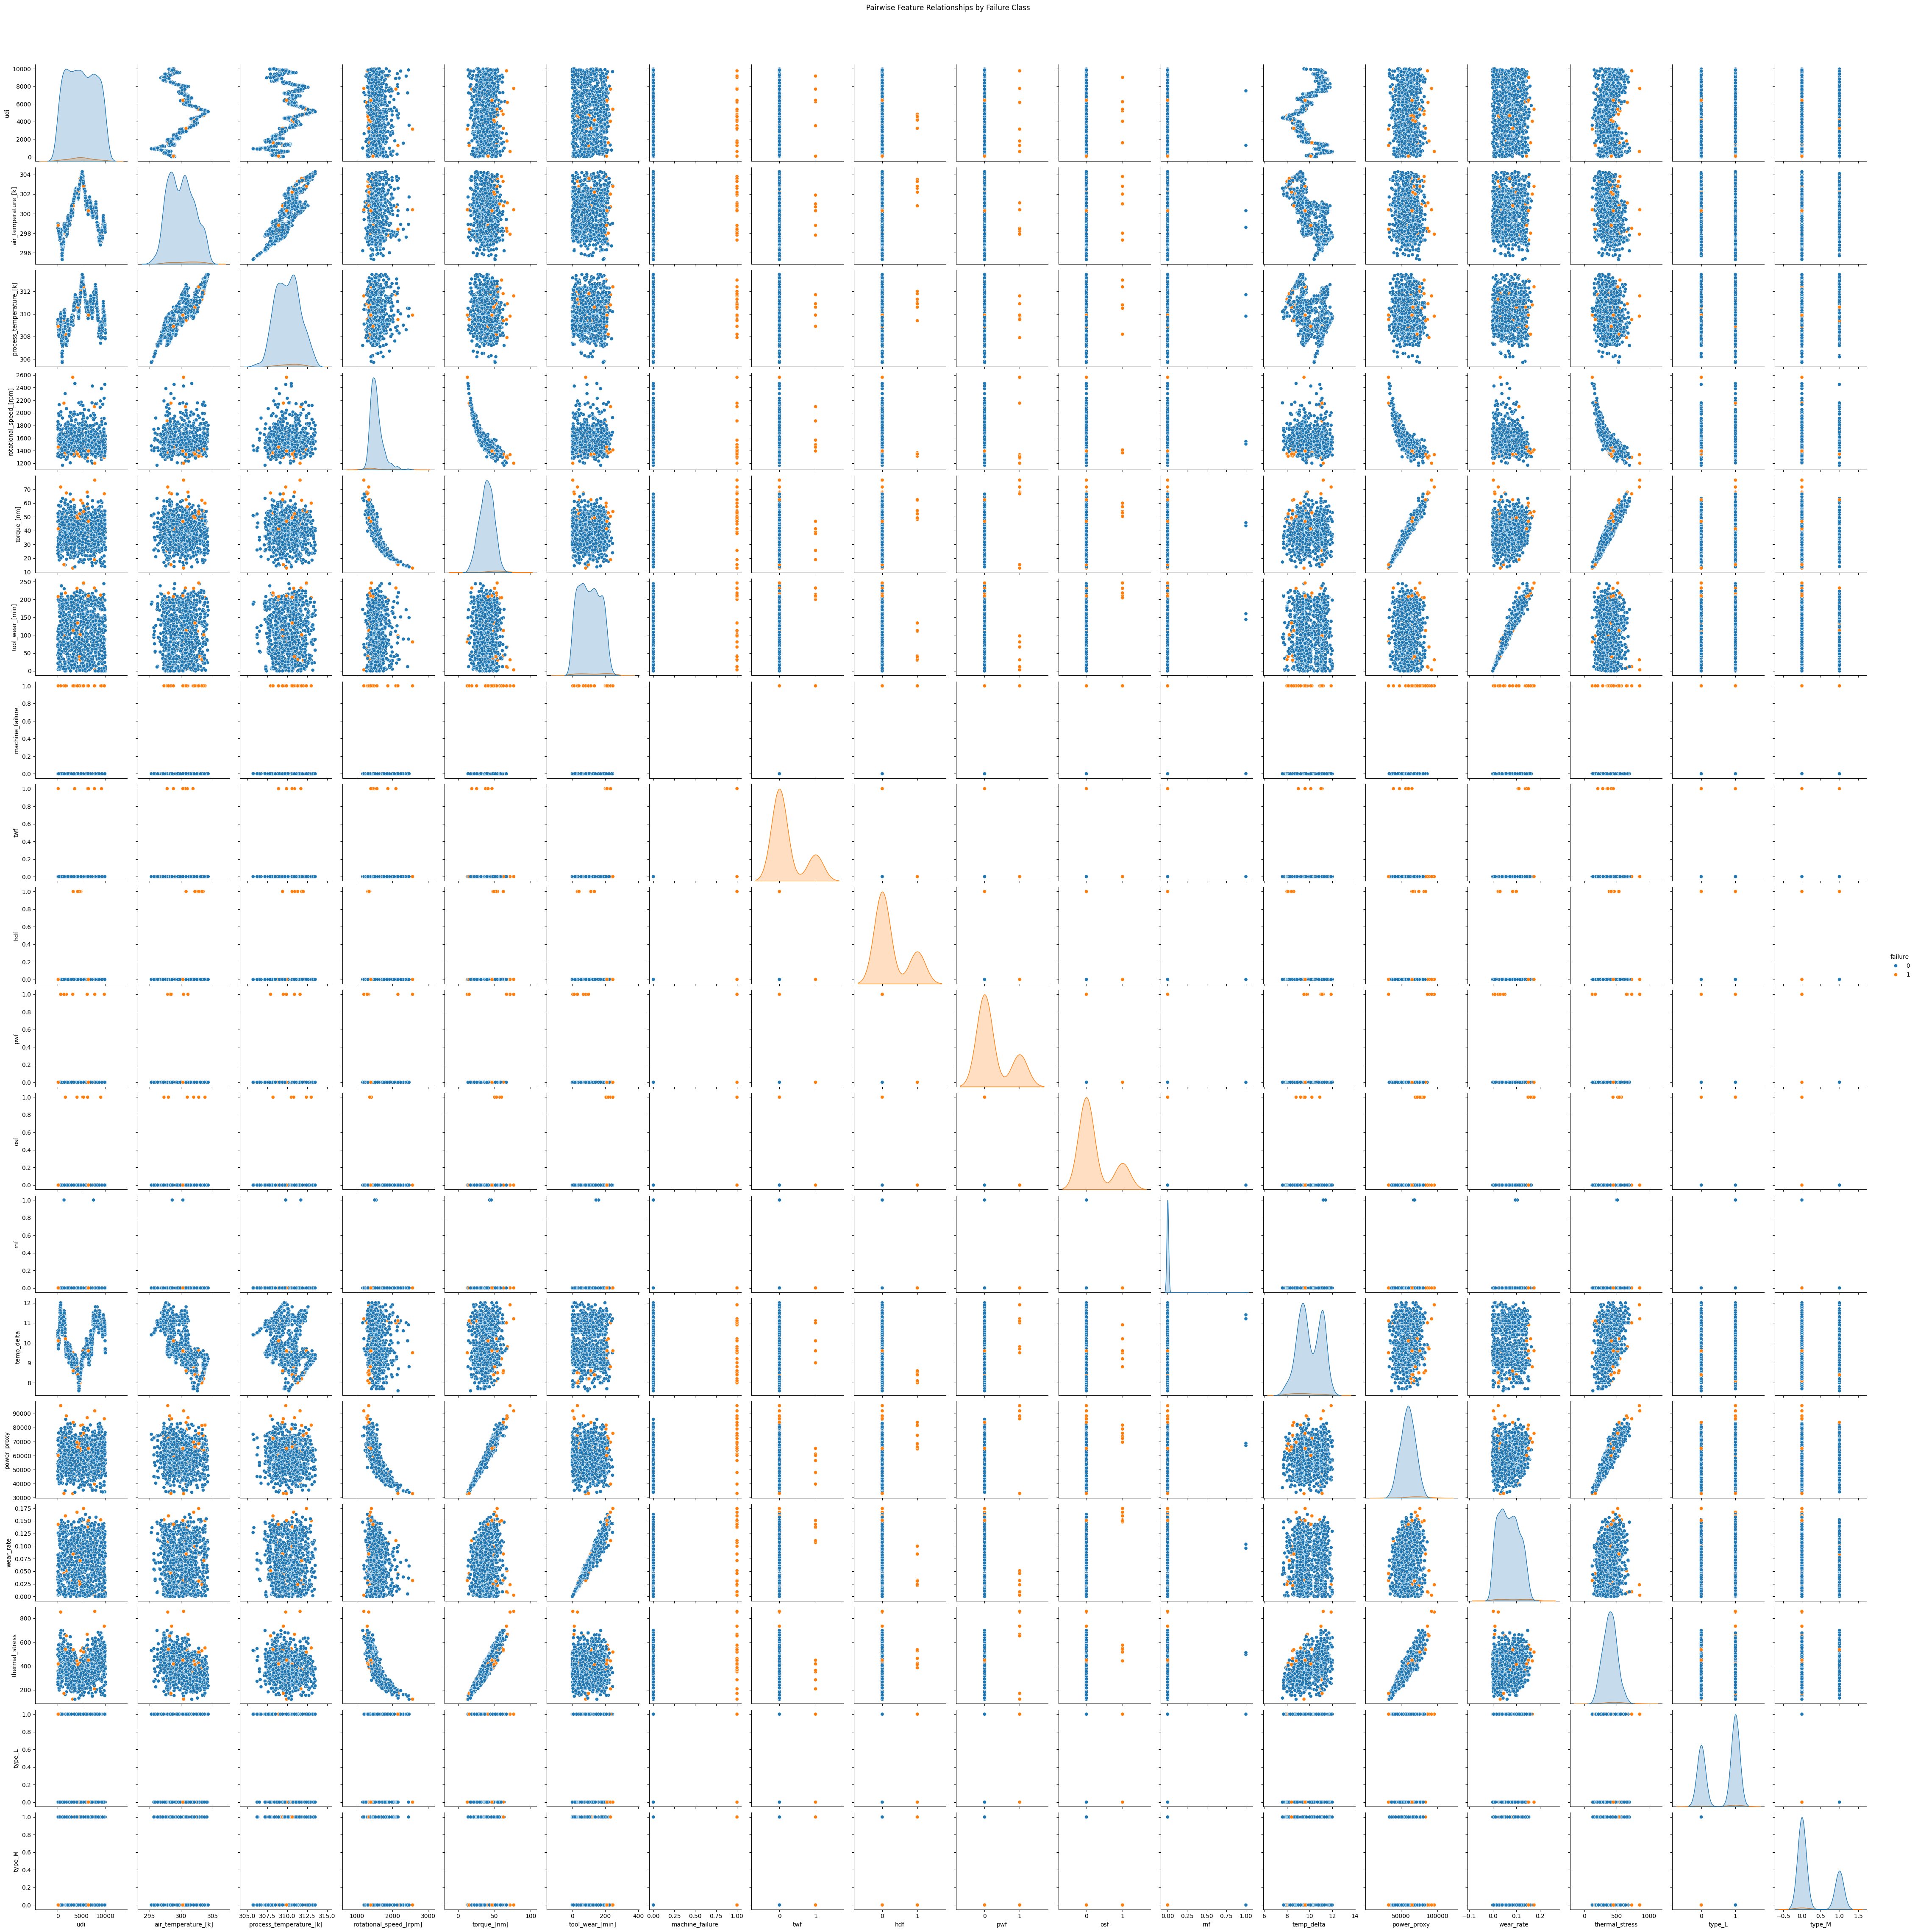

In [ ]:
import seaborn as sns

# Sample a small subset
sns.pairplot(df.sample(1000), hue='failure', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Failure Class', y=1.02)
plt.show()

/tmp/ipython-input-1779278314.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type_L', y='failure', data=df, ci=None)


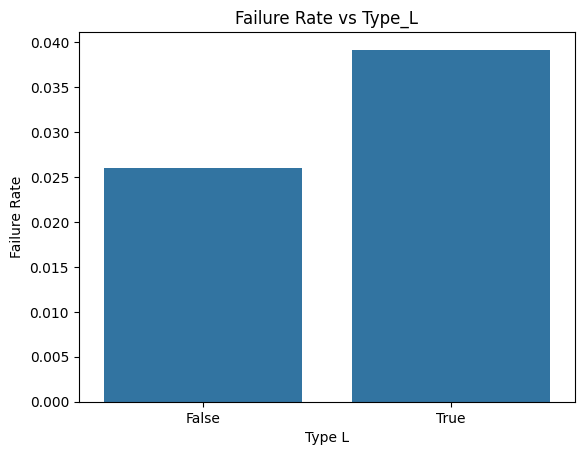

/tmp/ipython-input-1779278314.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type_M', y='failure', data=df, ci=None)


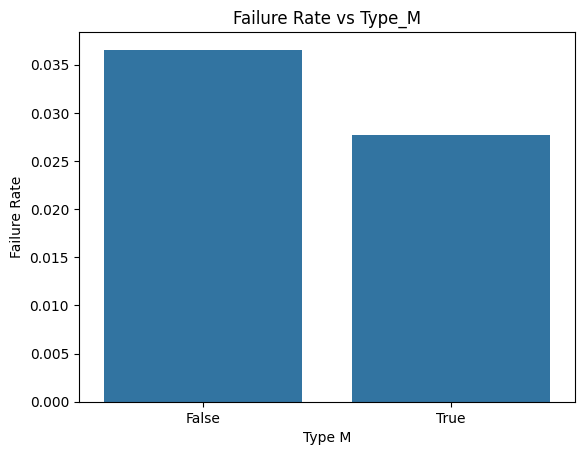

In [ ]:
sns.barplot(x='type_L', y='failure', data=df, ci=None)
plt.title('Failure Rate vs Type_L')
plt.xlabel('Type L')
plt.ylabel('Failure Rate')
plt.show()

sns.barplot(x='type_M', y='failure', data=df, ci=None)
plt.title('Failure Rate vs Type_M')
plt.xlabel('Type M')
plt.ylabel('Failure Rate')
plt.show()


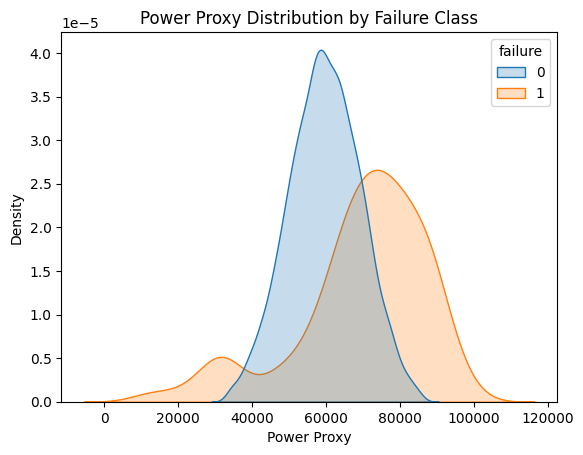

In [ ]:
sns.kdeplot(data=df, x='power_proxy', hue='failure', common_norm=False, fill=True)
plt.title('Power Proxy Distribution by Failure Class')
plt.xlabel('Power Proxy')
plt.show()

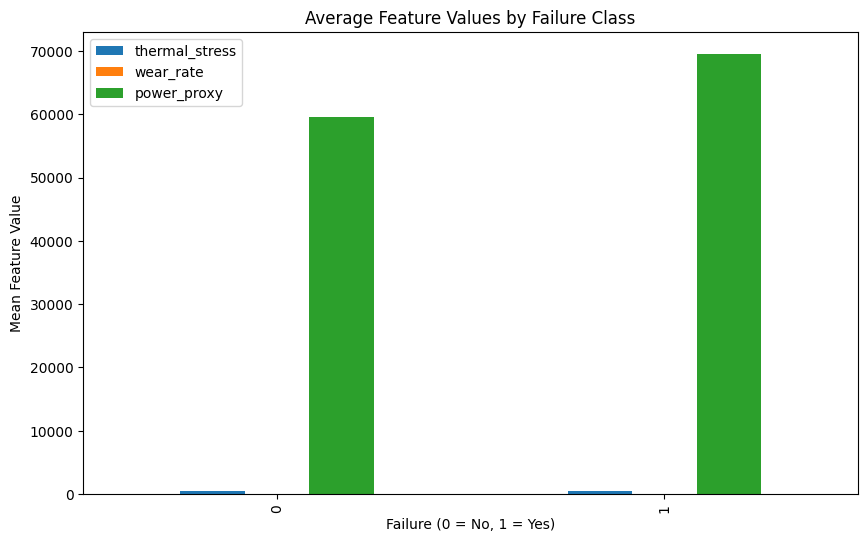

In [ ]:
df.groupby('failure')[['thermal_stress', 'wear_rate', 'power_proxy']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Failure Class')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Mean Feature Value')
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt

os.makedirs('plots', exist_ok=True)

plt.savefig('plots/your_plot_name.png')
plt.close()

Train/test and scaling pipeline

In [ ]:
X = df.drop(columns=['udi', 'product_id', 'machine_failure', 'failure'])

y = df['failure']

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified split to preserve class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Class distribution in train:\n{y_train.value_counts(normalize=True)}")

Train shape: (8000, 16), Test shape: (2000, 16)
Class distribution in train:
failure
0    0.966125
1    0.033875
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
import os
import joblib

# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Now save the scaler or model
joblib.dump(scaler, 'models/scaler.joblib')

['models/scaler.joblib']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
import os

# Separate features and target
X = df.drop(columns=['machine_failure'])
y = df['machine_failure']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Clean column names
def clean_column_names(df):
    df.columns = [col.strip().replace(' ', '_').replace('[','').replace(']','').replace('<','').replace('>','') for col in df.columns]
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

# Remove object (non-numeric) columns (like machine_id)
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test[X_train.columns]  # Ensure same columns in test set

# Apply scaling only to numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_scaled, y_train)

# Save model and scaler
os.makedirs('models', exist_ok=True)
joblib.dump(xgb, 'models/xgb_predictive_maintenance_model.joblib')
joblib.dump(scaler, 'models/scaler.joblib')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
import os


# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Train XGBoost
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05,
                    eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

# Ensure models folder exists
os.makedirs('models', exist_ok=True)

# Save trained models
joblib.dump(rf, 'models/random_forest_model.joblib')
joblib.dump(xgb, 'models/xgb_model.joblib')
joblib.dump(scaler, 'models/scaler.joblib')

print("Models and scaler saved successfully.")

Models and scaler saved successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Balanced class weights + fixed random state
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # Handles class imbalance automatically
    random_state=42,           # Ensures reproducibility
    n_jobs=-1                  # Faster parallel training
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

SHAP explainability

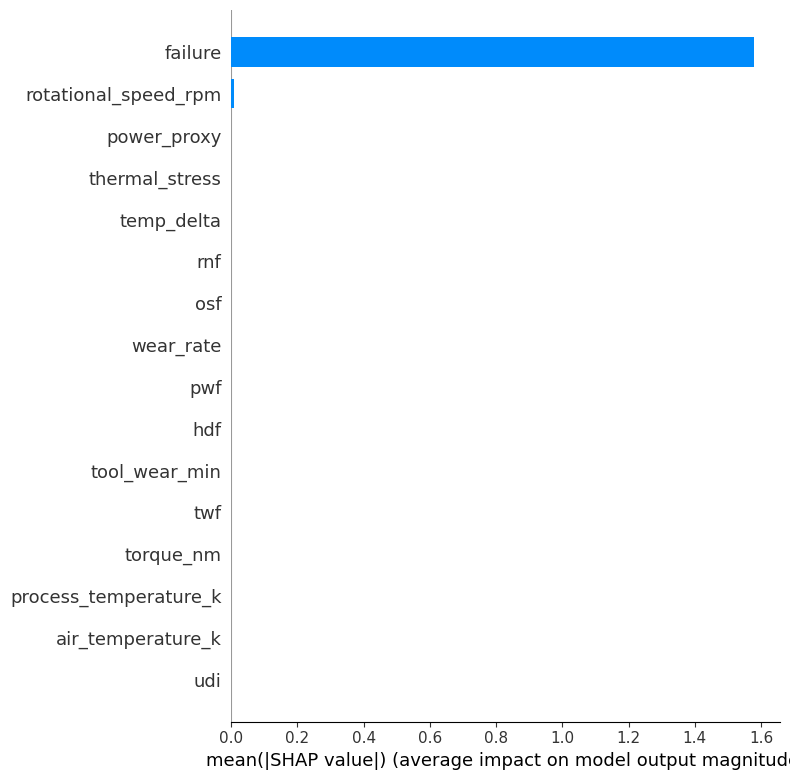

In [ ]:
import shap

# Initialize explainer
explainer = shap.Explainer(xgb, X_train_scaled)

# Compute SHAP values
shap_values = explainer(X_test_scaled)

# Plot summary for class 1 (the failure class)
shap.summary_plot(shap_values.values, X_test, plot_type="bar")

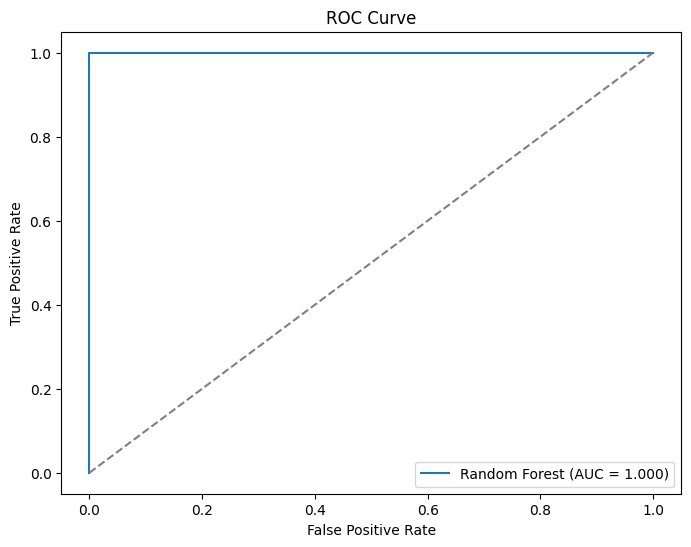

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

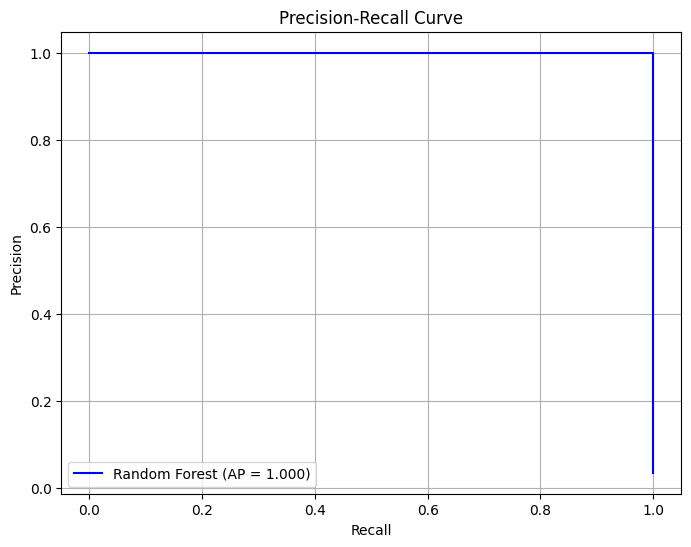

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot PR Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.3f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'models/random_forest_model.joblib')

# Save the scaler for future use
joblib.dump(scaler, 'models/scaler.joblib')

['models/scaler.joblib']

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Make final predictions
y_preds = rf.predict(X_test)

# Calculate key metrics
accuracy = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_probs)
conf_matrix = confusion_matrix(y_test, y_preds)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 1.0000
F1-score: 1.0000
ROC-AUC Score: 1.0000

Confusion Matrix:
[[1932    0]
 [   0   68]]


In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Save evaluation results to a text file
with open('results/model_evaluation.txt', 'w') as file:
    file.write(f"Accuracy: {accuracy:.4f}\n")
    file.write(f"F1-score: {f1:.4f}\n")
    file.write(f"ROC-AUC Score: {roc_auc:.4f}\n")
    file.write(f"Confusion Matrix:\n{conf_matrix}\n")

In [ ]:
import json
import os

# Ensure models folder exists
os.makedirs('models', exist_ok=True)

# Save the correct feature columns used during training
feature_columns = X_train.columns.tolist()  # Should contain 14 feature columns

with open('models/feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)

In [ ]:
import pandas as pd
import joblib
import json
import os

def load_model_and_scaler(model_path='models/random_forest_model.joblib',
                          scaler_path='models/scaler.joblib',
                          columns_path='models/feature_columns.json'):
    """Load saved model, scaler, and feature columns list."""
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    with open(columns_path, 'r') as f:
        feature_columns = json.load(f)
    return model, scaler, feature_columns


def predict_failure_probability(new_data_dict):
    """
    Predict failure probability for a single machine input.

    Parameters:
        new_data_dict (dict): Dictionary of input feature values.

    Returns:
        float: Predicted failure probability (0 to 1).
    """

    # Load model, scaler, and feature columns
    rf_model, scaler, feature_columns = load_model_and_scaler()

    # Create DataFrame with correct feature columns order
    new_data = pd.DataFrame([new_data_dict], columns=feature_columns)

    # Apply scaling
    new_data_scaled = scaler.transform(new_data)

    # Predict failure probability
    failure_prob = rf_model.predict_proba(new_data_scaled)[:, 1][0]
    return failure_prob


if __name__ == "__main__":
    sample_input = {
        'air_temperature_k': 298.1,
        'process_temperature_k': 308.5,
        'rotational_speed_rpm': 1500,
        'torque_nm': 45,
        'tool_wear_min': 5,
        'twf': 0,
        'hdf': 0,
        'pwf': 0,
        'osf': 0,
        'rnf': 0,
        'temp_delta': 10.4,
        'power_proxy': 67500,
        'wear_rate': 0.00333,
        'thermal_stress': 480.5
    }

    prob = predict_failure_probability(sample_input)
    print(f"Predicted Failure Probability: {prob:.4f}")

Predicted Failure Probability: 0.1433


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
